In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 1) Data Understanding
## Data-Set Description

In [2]:
data = pd.read_csv("D:\HR_Engagement_Sat_Sales.csv")

In [3]:
pd.set_option('display.max_columns', 500)
data.head()

,ID,Name,Department,GEO,Role,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,CSR Factor,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,1,BRADDY,Operations,US,VP,NaN,0,1.0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,0,NaN,0,sales,low,M,5,4,3,1,1,1,1,2,1,NaN,1.0,2,4,2,2,2,2,2,2,1,5,1841,61,9
1,2,BORST,Sales,UK,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,NaN,0,accounting,low,F,58,3,3,4,3,2,1,2,1,0.0,NaN,2,2,1,4,1,3,2,5,1,5,1990,90,8
2,3,BIRDWELL,Finance,France,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,NaN,0,product_mng,medium,F,42,2,4,1,3,1,1,2,2,1.0,NaN,1,5,1,2,5,2,2,4,4,4,3193,80,8
3,4,BENT,Human Resources,China,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,0,NaN,0,product_mng,high,M,37,3,1,4,5,2,1,2,1,NaN,1.0,1,1,2,5,1,1,2,4,4,1,3248,77,6
4,5,BAZAN,IT,Korea,Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,0,NaN,0,sales,low,F,6,4,5,4,5,1,1,2,1,1.0,NaN,1,4,1,5,3,5,1,2,5,4,3149,80,10


In [4]:
data.shape

(14999, 62)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     14999 non-null  int64  
 1   Name                                   14997 non-null  object 
 2   Department                             14999 non-null  object 
 3   GEO                                    14999 non-null  object 
 4   Role                                   14999 non-null  object 
 5   Rising_Star                            21 non-null     float64
 6   Will_Relocate                          14999 non-null  int64  
 7   Critical                               480 non-null    float64
 8   Trending Perf                          14999 non-null  int64  
 9   Talent_Level                           14999 non-null  int64  
 10  Validated_Talent_Level                 14999 non-null  int64  
 11  Pe

# EXPLORATORY DATA ANALYSIS

In [6]:
data.describe(include='all')

,ID,Name,Department,GEO,Role,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,CSR Factor,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
count,14999.000000,14997,14999,14999,14999,21.0,14999.000000,480.0,14999.0,14999.0,14999.0,14999.000000,14871.0,14871.000000,14871.000000,14871.000000,14871.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,1713.0,14999.000000,14999,14999,14999,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,7596.000000,4865.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
unique,NaN,14997,6,9,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,BRADDY,Operations,UK,Level 2-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,2500,1772,6889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316,7596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7500.000000,NaN,NaN,NaN,NaN,1.0,0.499833,1.0,3.0,6.0,6.0,0.617321,3.0,2.731962,3.731962,2.731962,3.943649,2.839723,4.367691,3.367691,3.761784,3.973598,4.047670,4.285752,3.761917,3.523835,2.523835,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,5.0,0.021268,NaN,NaN,NaN,18.553904,3.001867,3.014468,3.005800,3.002867,2.141343,2.116274,1.998400,1.990066,0.707741,0.908530,2.156010,2.987199,2.144010,2.999067,2.987066,2.979532,1.676245,2.998533,3.005200,3.016934,3406.693246,77.967198,6.399360
std,4329.982679,NaN,NaN,NaN,NaN,0.0,0.500017,0.0,0.0,0.0,0.0,0.193841,0.0,0.681369,0.681369,0.681369,1.244511,0.776054,0.929979,0.929979,0.580834,1.367462,1.703696,1.277772,0.425924,0.851848,0.851848,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.0,0.144281,NaN,NaN,NaN,18.987335,1.413788,1.417319,1.418791,1.413008,1.023277,1.010454,0.865389,0.856232,0.454831,0.288306,1.032378,1.416793,1.030439,1.406128,1.412314,1.412579,0.865230,1.410058,1.410191,1.412225,1755.742272,7.252848,2.588091
min,1.000000,NaN,NaN,NaN,NaN,1.0,0.000000,1.0,3.0,6.0,6.0,0.400000,3.0,1.000000,2.000000,1.000000,1.000000,2.000000,3.000000,2.000000,3.000000,2.000000,1.000000,2.000000,3.000000,2.000000,1.000000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,5.0,0.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1000.000000,60.000000,1.000000
25%,3750.500000,NaN,NaN,NaN,NaN,1.0,0.000000,1.0

The dataset consists of details of employees from 9 different countries working in 6 departments performing various roles.

There is about 50% chance that an employee will relocate.

Almost 61% of the work is done remotely by the employees.

Each employee has completed atleast 2 projects and a maximum of 7 projects.

Each employee works for minimum of 96 hours and a maximum of 310 hours on an average monthly.

Almost 24% of the employees already left the organization.

Only 2% of the employees got promotion in the last 5 years and most of the employees get low salary.

Majority of the employees are females.

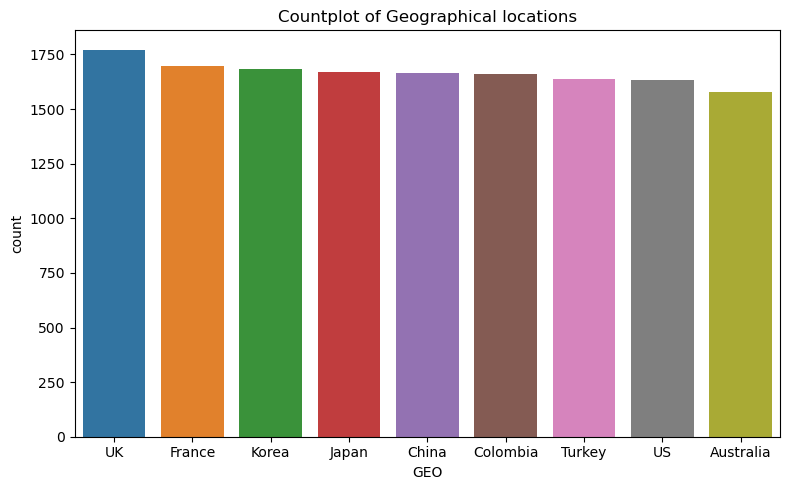

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(
    x = 'GEO',
    data=data,
    order=data['GEO'].value_counts().index,
)
plt.title('Countplot of Geographical locations')
plt.tight_layout()
plt.show()

*Compared to other countries, more employees are from UK and the least number of employees are from Australia. But there isn't a comparable difference in the number of employees from different countries.

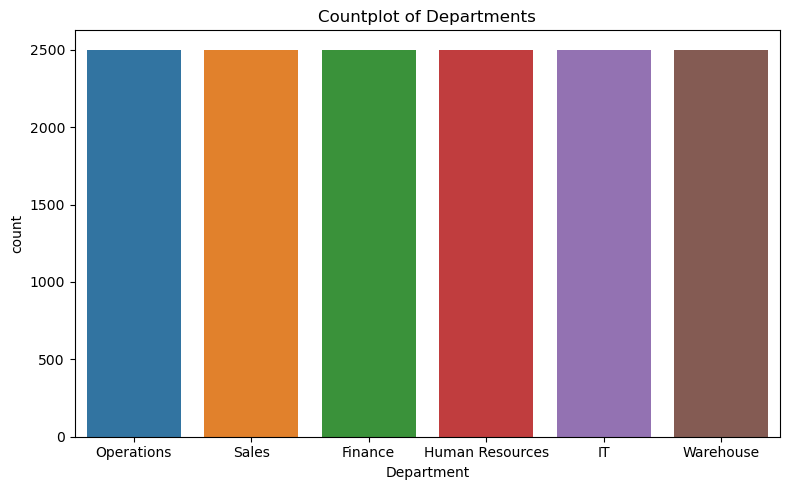

In [8]:
plt.figure(figsize=(8,5))
sns.countplot(
    x = 'Department',
    data=data,
    order=data['Department'].value_counts().index)
plt.title('Countplot of Departments')
plt.tight_layout()
plt.show()

*The number of employees from different departments are almost equal.

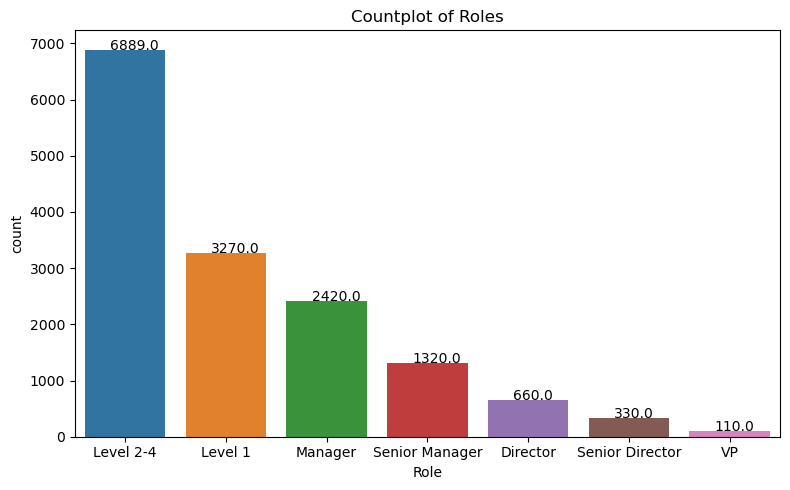

In [9]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x='Role',
                 data = data,
                order = data['Role'].value_counts().index)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title('Countplot of Roles')
plt.tight_layout()
plt.show()

In [10]:
data[['average_montly_hours','last_evaluation']].corr()

,average_montly_hours,last_evaluation
average_montly_hours,1.000000,0.339742
last_evaluation,0.339742,1.000000


*There is a low positive correlation between average monthly hours and last evaluation.

In [11]:
data[['average_montly_hours','number_project']].corr()

,average_montly_hours,number_project
average_montly_hours,1.000000,0.417211
number_project,0.417211,1.000000


*There is a low positive correlation between average monthly hours and number of projects.

In [12]:
data[['LinkedIn_Hits','Percent_Remote']].corr()

,LinkedIn_Hits,Percent_Remote
LinkedIn_Hits,1.000000,-0.713644
Percent_Remote,-0.713644,1.000000


*LinkedIn hits and Percent remote columns have high negative correlation.

In [13]:
data.groupby('Gender')['average_montly_hours'].mean()

Gender
F    200.216035
M    201.906389
Name: average_montly_hours, dtype: float64

*Both male and female employees spend almost same amount of time for work monthly.

In [14]:
data.groupby('Gender')['Work_accident'].sum()

Gender
F    1124
M    1045
Name: Work_accident, dtype: int64

*Females have had more work accidents when compared to males.

In [15]:
data.groupby('Gender')['left_Company'].sum()

Gender
F    1840
M    1731
Name: left_Company, dtype: int64

*More females have left the company when compared to males

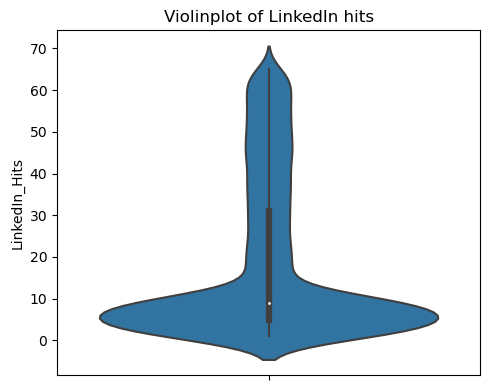

In [16]:
plt.figure(figsize=(5,4))
sns.violinplot(y=data['LinkedIn_Hits'])
plt.title('Violinplot of LinkedIn hits')
plt.tight_layout()
plt.show()

*more frequent linkedin hits are in between 0 and 10.

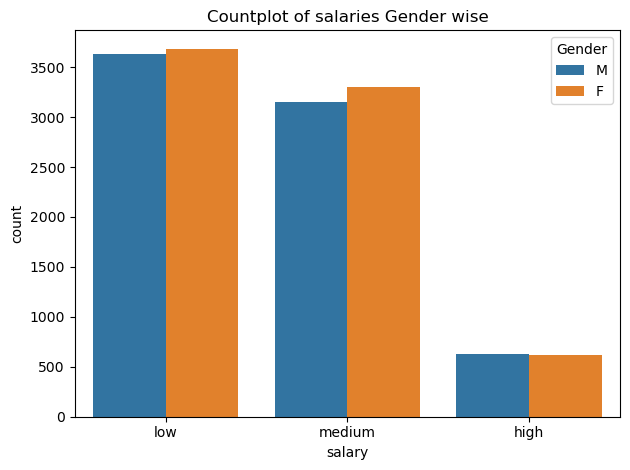

In [17]:
sns.countplot(x='salary', hue='Gender', data=data)
plt.title('Countplot of salaries Gender wise')
plt.tight_layout()
plt.show()

*Number of males and females in each salary level are almost equal.

*Most of the employees receive low salary.

*only few employees enjoy high salary.

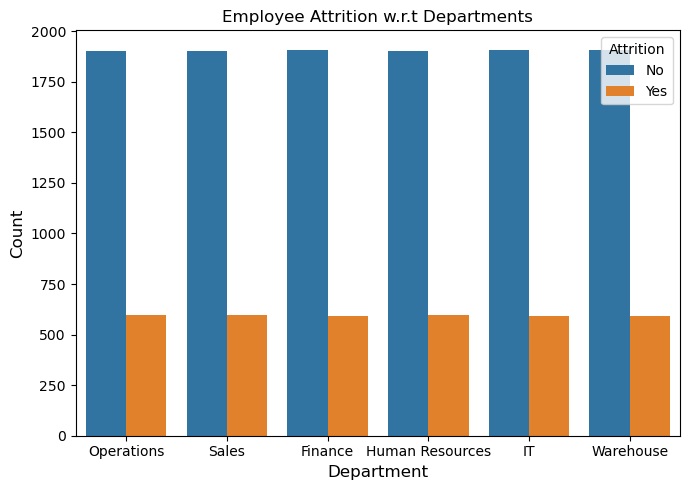

In [18]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Department', hue='left_Company', data=data)
plt.title('Employee Attrition w.r.t Departments')
plt.xlabel('Department', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(['No', 'Yes'], title="Attrition", loc="upper right")
plt.tight_layout()
plt.show()

*Almost same number of employees have left from each department.

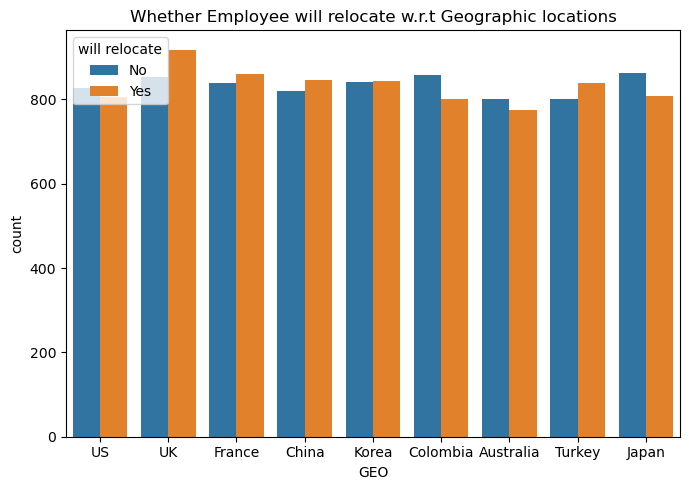

In [19]:
plt.figure(figsize=(7,5))
sns.countplot(x = 'GEO', hue = 'Will_Relocate',data = data)
plt.title('Whether Employee will relocate w.r.t Geographic locations')
plt.legend(['No','Yes'],title='will relocate', loc="upper left")
plt.tight_layout()
plt.show()

*When we compare all of the geographic locations, we can see that there is not much difference between the number of employees willing to relocate and not.

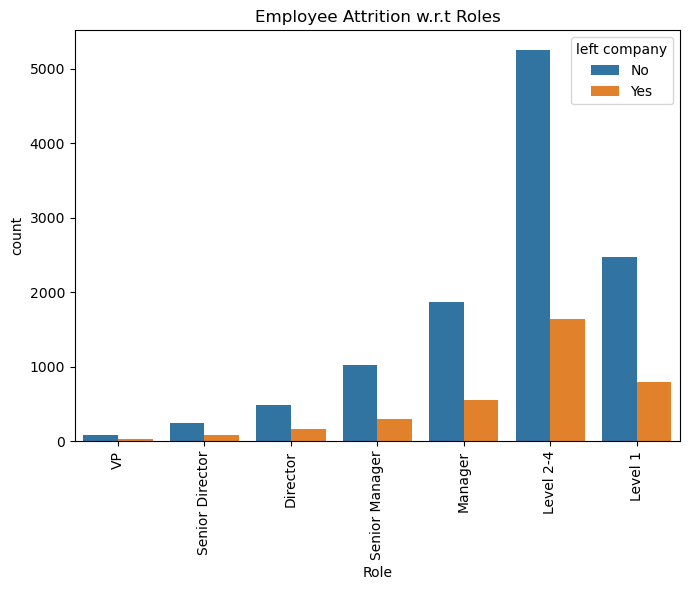

In [20]:
plt.figure(figsize=(7,6))
sns.countplot(x = 'Role', hue = 'left_Company' , data = data)
plt.title('Employee Attrition w.r.t Roles')
plt.legend(['No','Yes'],title='left company', loc="upper right")
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

*Most of the employees who have left the company are from Level 2-4 role.

*Number of employees who left the organization increased with total number of employees in each role.

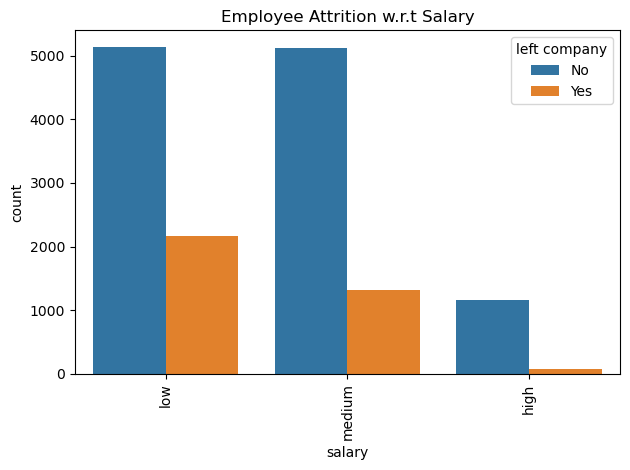

In [21]:
sns.countplot(x = 'salary', hue='left_Company',data = data)
plt.title('Employee Attrition w.r.t Salary')
plt.legend(['No','Yes'],title='left company', loc="upper right")
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

*Employees with low salaries have left the organization in more numbers.

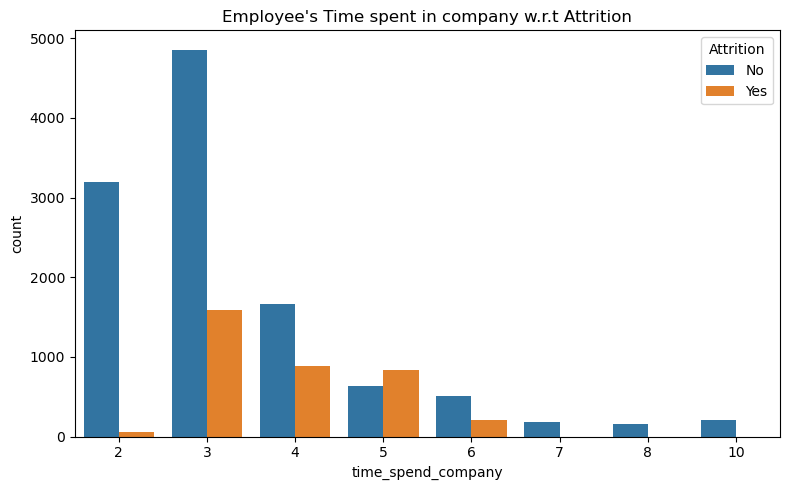

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'time_spend_company', hue = 'left_Company',data = data)
plt.title("Employee's Time spent in company w.r.t Attrition")
plt.legend(['No','Yes'],title='Attrition', loc="upper right")
plt.tight_layout()
plt.show()

Employee's who left spent almost 2-6 years in the company.

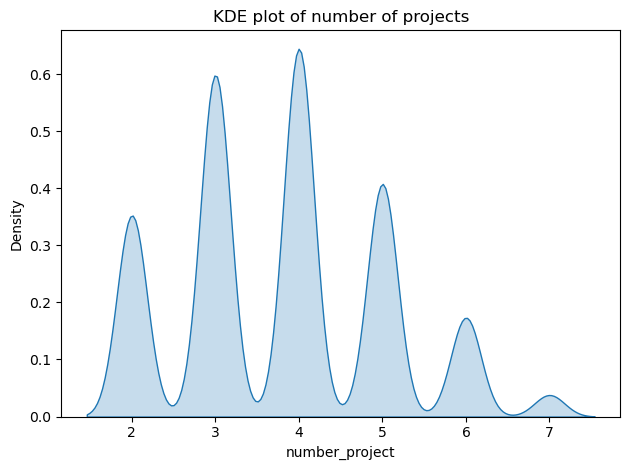

In [23]:
sns.kdeplot(data['number_project'],fill=True)
plt.title('KDE plot of number of projects')
plt.tight_layout()
plt.show()

*Each employee has completed atleast 2 projects and a maximum of 7 projects.

*Most of the employees have completed 3-5 projects.

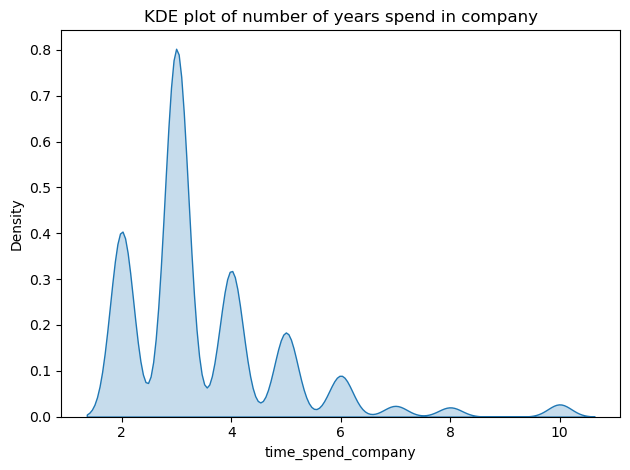

In [24]:
sns.kdeplot(data['time_spend_company'],fill=True)
plt.title('KDE plot of number of years spend in company')
plt.tight_layout()
plt.show()

*Most of the employees have spend 2-4 years in the organization.

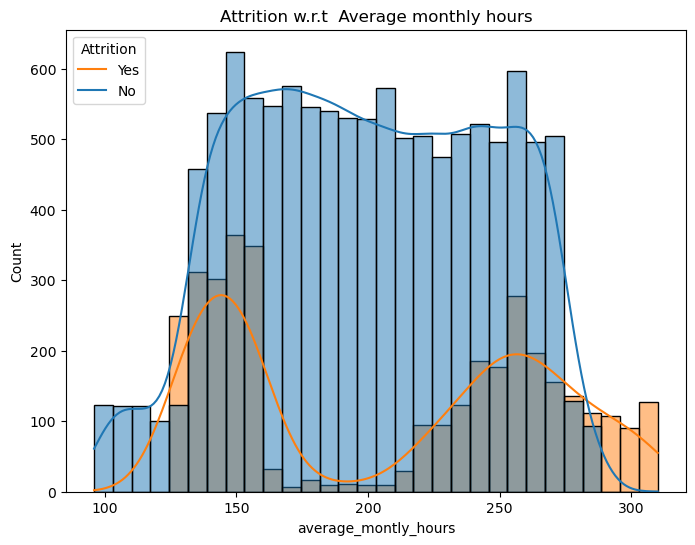

In [25]:
#attrition w.r.t average monthly hrs 
plt.figure(figsize=(8,6))
sns.histplot(x='average_montly_hours', hue='left_Company', data=data, kde=True)
plt.title('Attrition w.r.t  Average monthly hours')
plt.legend(['Yes','No'],title='Attrition', loc="upper left")
plt.show()

*All the employees who have worked for nearly 300 hours on a monthly average left the organization.

*Employees who have worked for minimum hours on a monthly average are continuing in the organization.

In [26]:
data.columns

Index(['ID', 'Name', 'Department', 'GEO', 'Role', 'Rising_Star',
       'Will_Relocate', 'Critical', 'Trending Perf', 'Talent_Level',
       'Validated_Talent_Level', 'Percent_Remote', 'EMP_Sat_OnPrem_1',
       'EMP_Sat_OnPrem_2', 'EMP_Sat_OnPrem_3', 'EMP_Sat_OnPrem_4',
       'EMP_Sat_OnPrem_5', 'EMP_Sat_Remote_1', 'EMP_Sat_Remote_2',
       'EMP_Sat_Remote_3', 'EMP_Sat_Remote_4', 'EMP_Sat_Remote_5',
       'EMP_Engagement_1', 'EMP_Engagement_2', 'EMP_Engagement_3',
       'EMP_Engagement_4', 'EMP_Engagement_5', 'last_evaluation',
       'number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'left_Company', 'CSR Factor', 'promotion_last_5years',
       'sales', 'salary', 'Gender', 'LinkedIn_Hits', 'Emp_Work_Status2',
       'Emp_Work_Status_3', 'Emp_Work_Status_4', 'Emp_Work_Status_5',
       'Emp_Identity', 'Emp_Role', 'Emp_Position', 'Emp_Title', 'Women_Leave',
       'Men_Leave', 'Emp_Competitive_1', 'Emp_Competitive_2',
       'Emp_Competitive_3',

<Axes: >

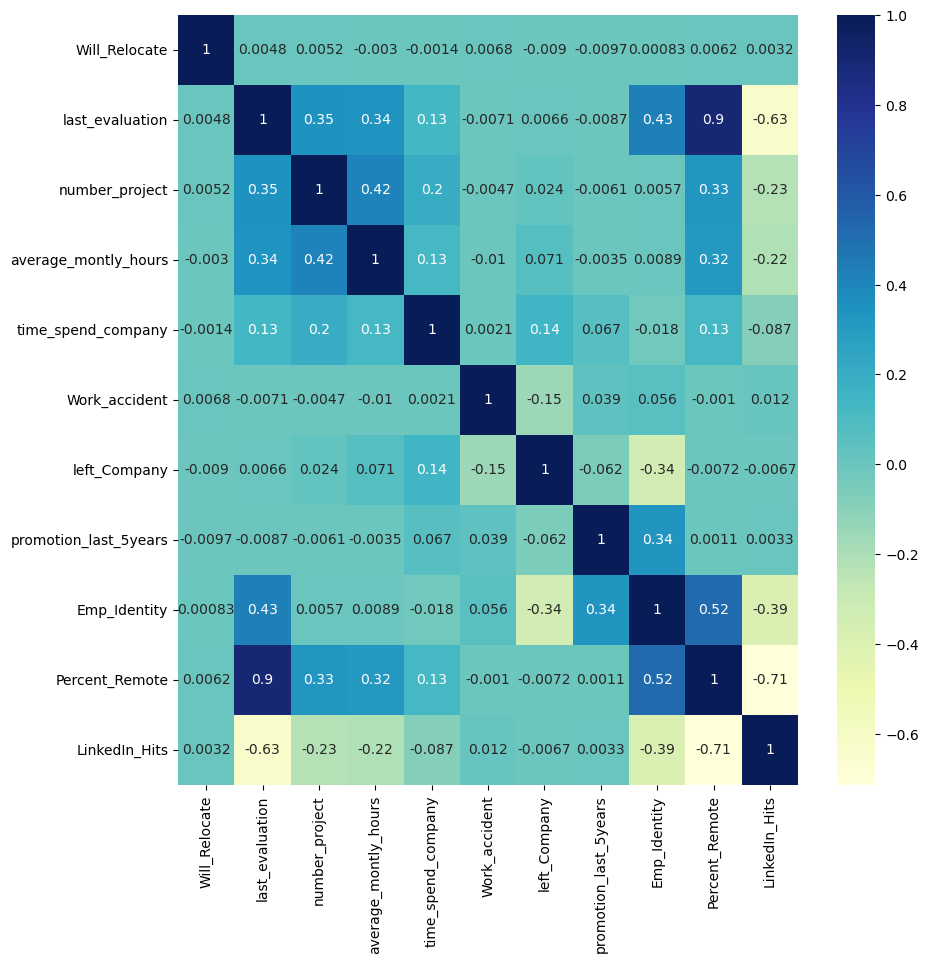

In [27]:
plt.figure(figsize=(10,10))
dt_htmap=data[['Will_Relocate','last_evaluation',
       'number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'left_Company','promotion_last_5years','Emp_Identity','Percent_Remote','LinkedIn_Hits']]
sns.heatmap(dt_htmap.corr(), annot=True, cmap='YlGnBu')

There is a strong positive correlation between the columns 'Percent_Remote' and 'last_evaluation'.

There is a high negative correlation between the columns 'Percent_Remote' and 'LinkedIn_Hits'.

There is a high negative correlation between the columns 'last_evaluation' and 'LinkedIn_Hits'.

# 2) DATA PRE-PROCESSING :-

## HANDLING MISSING VALUES:-

In [28]:
pd.set_option('display.max_rows', 500)

In [29]:
data.isna().sum()

ID                                           0
Name                                         2
Department                                   0
GEO                                          0
Role                                         0
Rising_Star                              14978
Will_Relocate                                0
Critical                                 14519
Trending Perf                                0
Talent_Level                                 0
Validated_Talent_Level                       0
Percent_Remote                               0
EMP_Sat_OnPrem_1                           128
EMP_Sat_OnPrem_2                           128
EMP_Sat_OnPrem_3                           128
EMP_Sat_OnPrem_4                           128
EMP_Sat_OnPrem_5                           128
EMP_Sat_Remote_1                             0
EMP_Sat_Remote_2                             0
EMP_Sat_Remote_3                             0
EMP_Sat_Remote_4                             0
EMP_Sat_Remot

In the dataset, the columns Name, Rising star, Critical, EMP_Sat_OnPrem_1, EMP_Sat_OnPrem_2, EMP_Sat_OnPrem_3, EMP_Sat_OnPrem_4, EMP_Sat_OnPrem_5, CSR Factor, Women_Leave, Men_Leave have missing values.

First we will handle missing values in the columns EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4 and EMP_Sat_OnPrem_5.

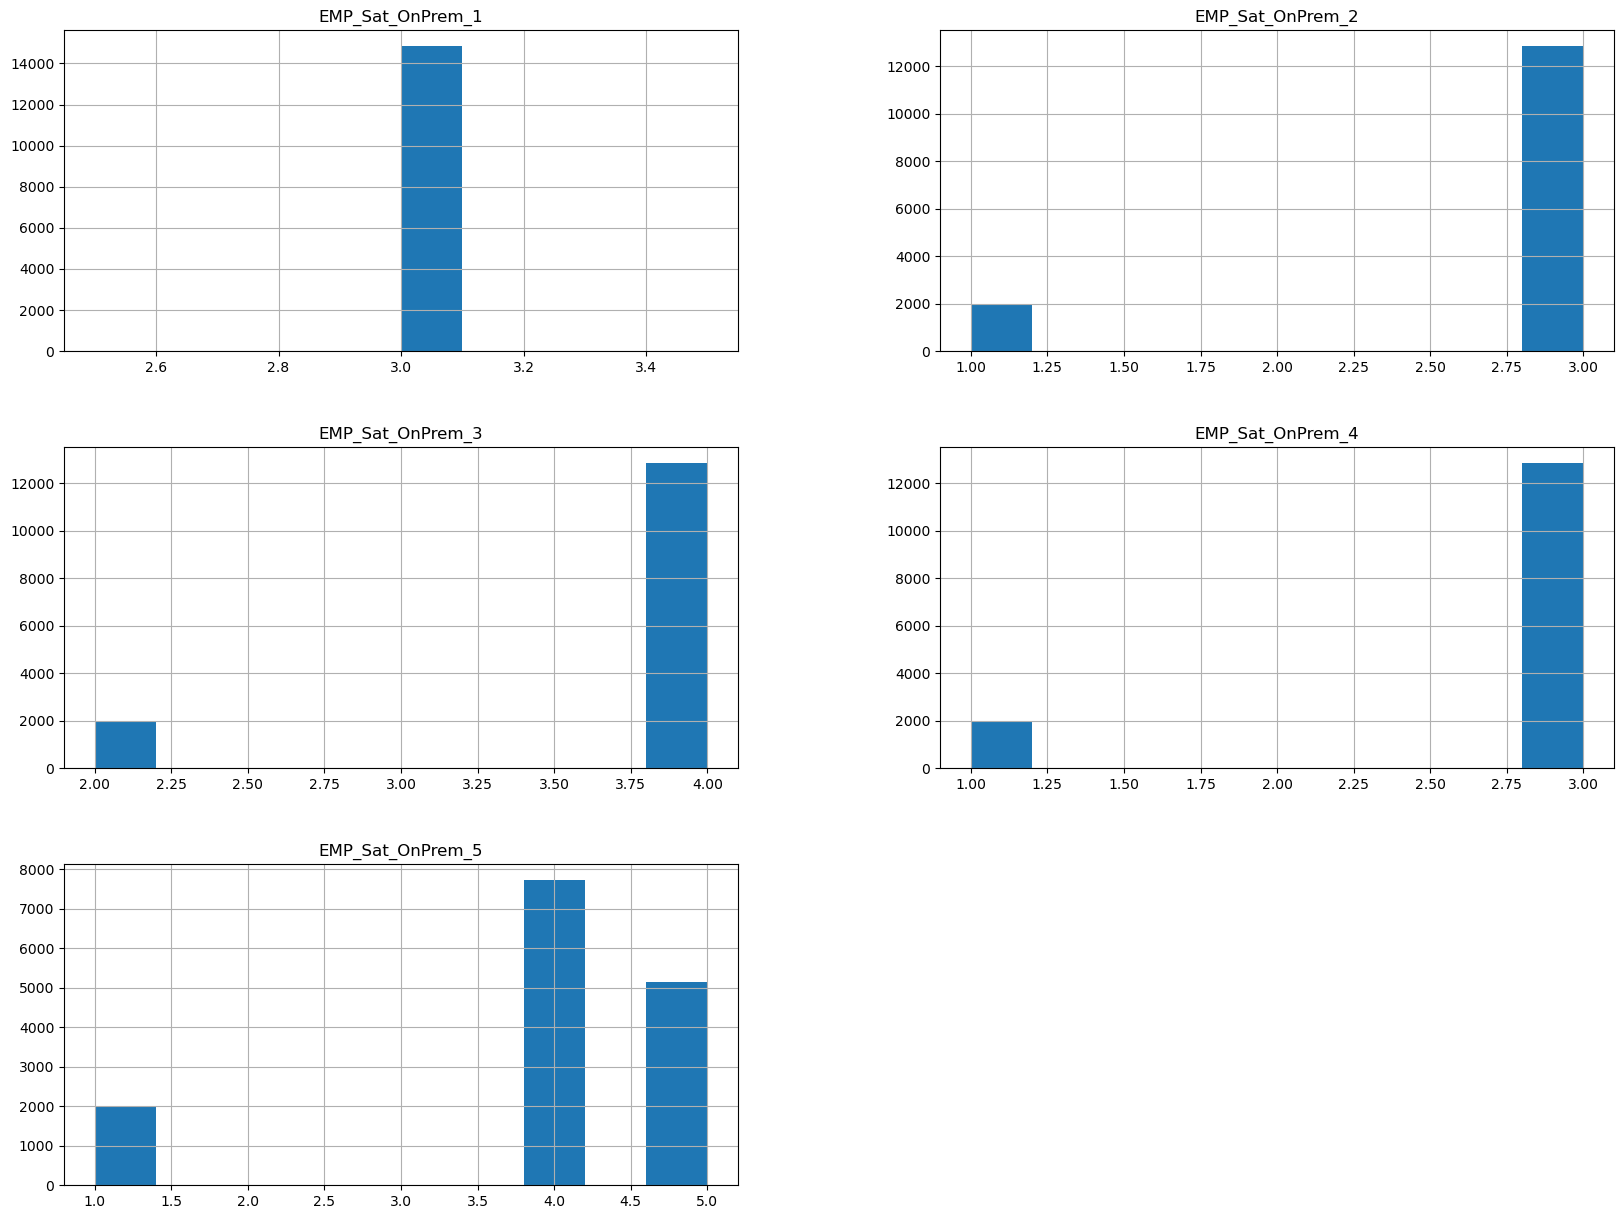

In [30]:
#check for skewness
freqgraph=data[['EMP_Sat_OnPrem_1','EMP_Sat_OnPrem_2','EMP_Sat_OnPrem_3','EMP_Sat_OnPrem_4','EMP_Sat_OnPrem_5']]
freqgraph.hist(figsize=(20,15))
plt.show()

Since we observed skewness in most of these columns, we fill the missing values in these columns with their respective modes.

In [31]:
for i in data[['EMP_Sat_OnPrem_1','EMP_Sat_OnPrem_2','EMP_Sat_OnPrem_3','EMP_Sat_OnPrem_4','EMP_Sat_OnPrem_5']]:
  data[i]=data[i].fillna(data[i].mode()[0])

There are two missing values in the column 'Name'. Since the data in this column is not much relevant for our study, we let it stay as it is.

The columns 'Rising star', 'Critical', 'CSR factor' have more than 80% missing values. Also 'Women_Leave','Men_Leave' columns have more than 48% missing values we choose not to fill these columns and drop them eventually.

In [32]:
data.isna().sum()

ID                                           0
Name                                         2
Department                                   0
GEO                                          0
Role                                         0
Rising_Star                              14978
Will_Relocate                                0
Critical                                 14519
Trending Perf                                0
Talent_Level                                 0
Validated_Talent_Level                       0
Percent_Remote                               0
EMP_Sat_OnPrem_1                             0
EMP_Sat_OnPrem_2                             0
EMP_Sat_OnPrem_3                             0
EMP_Sat_OnPrem_4                             0
EMP_Sat_OnPrem_5                             0
EMP_Sat_Remote_1                             0
EMP_Sat_Remote_2                             0
EMP_Sat_Remote_3                             0
EMP_Sat_Remote_4                             0
EMP_Sat_Remot

## Handling outliers

In [33]:
data1=data.select_dtypes(include=['int','float'])
data1.dtypes

ID                                         int64
Rising_Star                              float64
Will_Relocate                              int64
Critical                                 float64
Trending Perf                              int64
Talent_Level                               int64
Validated_Talent_Level                     int64
Percent_Remote                           float64
EMP_Sat_OnPrem_1                         float64
EMP_Sat_OnPrem_2                         float64
EMP_Sat_OnPrem_3                         float64
EMP_Sat_OnPrem_4                         float64
EMP_Sat_OnPrem_5                         float64
EMP_Sat_Remote_1                           int64
EMP_Sat_Remote_2                           int64
EMP_Sat_Remote_3                           int64
EMP_Sat_Remote_4                           int64
EMP_Sat_Remote_5                           int64
EMP_Engagement_1                           int64
EMP_Engagement_2                           int64
EMP_Engagement_3    

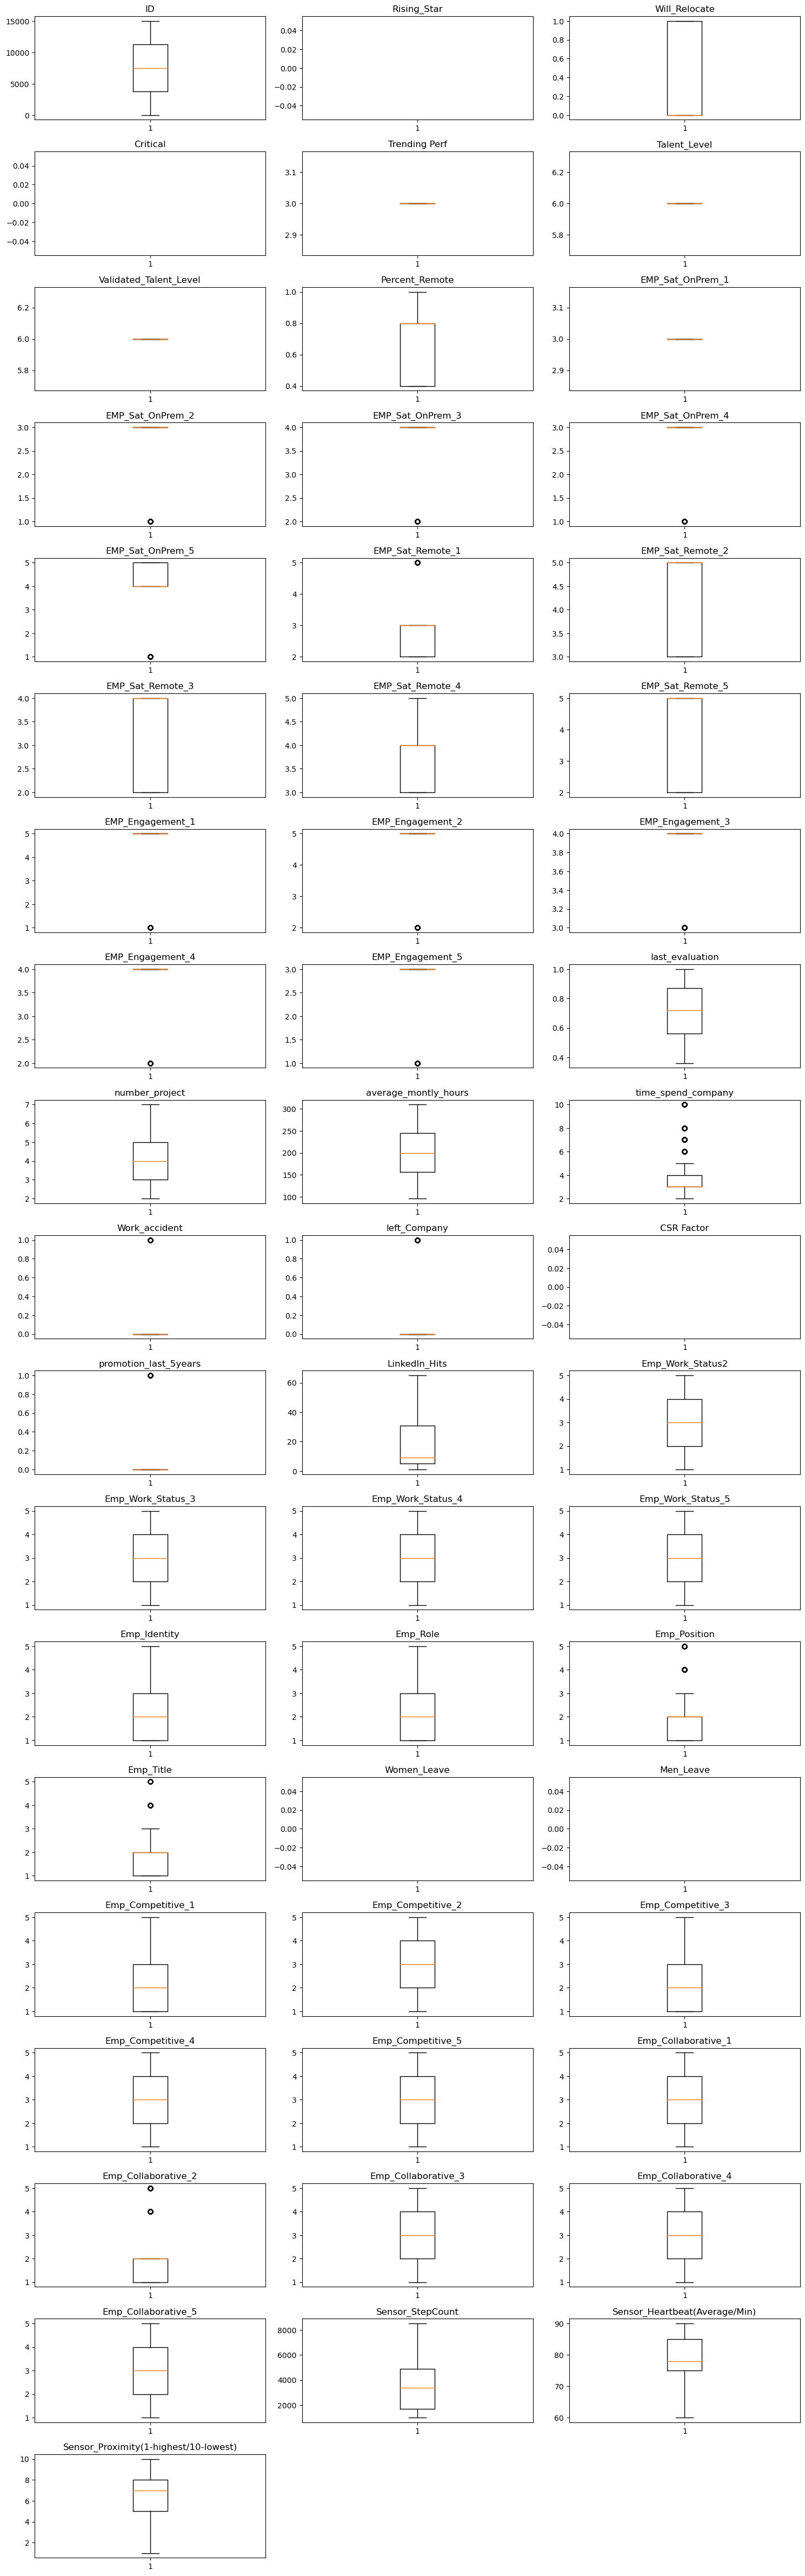

In [34]:
#check for outliers
plt.figure(figsize=(15,50))
for i,feature in enumerate(data1.columns):
    plt.subplot(20,3,i+1)
    plt.boxplot(data1[feature])
    plt.title(feature)
    plt.tight_layout()
plt.show()

In [35]:
data['time_spend_company'].value_counts()

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64

In [36]:
data['Emp_Position'].value_counts()

2    7025
1    4518
3    2490
4     894
5      72
Name: Emp_Position, dtype: int64

In [37]:
data['Emp_Title'].value_counts()

2    6971
1    4570
3    2535
4     883
5      40
Name: Emp_Title, dtype: int64

In [38]:
data['Emp_Collaborative_2'].value_counts()

1    7072
2    7035
4     460
5     432
Name: Emp_Collaborative_2, dtype: int64

We detected outliers in certain columns, but when we checked for its unique values we understood that these values cannot be treated as outliers.

# Feature Engineering:-

In [39]:
data['EMP_Sat_OnPrem']=data[['EMP_Sat_OnPrem_1', 'EMP_Sat_OnPrem_2', 'EMP_Sat_OnPrem_3', 'EMP_Sat_OnPrem_4', 'EMP_Sat_OnPrem_5']].mean(axis=1)

We created a new column 'EMP_Sat_OnPrem' by taking the mean of the 5 columns having data of survey that was sent to employees. It indicates the employee's satisfaction of work on the corporation’s physical work locations. Scale (1-10).

In [40]:
data['EMP_Sat_Remote']=data[['EMP_Sat_Remote_1', 'EMP_Sat_Remote_2', 'EMP_Sat_Remote_3', 'EMP_Sat_Remote_4', 'EMP_Sat_Remote_5']].mean(axis=1)

We created a new column 'EMP_Sat_Remote' by taking the mean of the 5 columns having data of survey that was sent to employees. It indicates the employee's satisfaction of work away from the corporation’s physical work locations. Scale (1-10)

In [41]:
data['EMP_Engagement']=data[['EMP_Engagement_1', 'EMP_Engagement_2', 'EMP_Engagement_3','EMP_Engagement_4', 'EMP_Engagement_5']].mean(axis=1)

We created a new column 'EMP_Engagement' by taking the mean of the 5 columns having data of survey that was sent to employees. Engagement represents the employee's feeling about how they feel about being engaged in company activities. Scale(1-5)

In [42]:
data['Emp_Work_Status']=data[['Emp_Work_Status2','Emp_Work_Status_3', 'Emp_Work_Status_4', 'Emp_Work_Status_5']].mean(axis=1)

We created a new column 'Emp_Work_Status' by taking the mean of the 4 columns having data of survey that was sent to employees. Status represents how strongly employee feels about their status level in the organization. Scale (1-10)

In [43]:
data['Emp_Competitive']=data[['Emp_Competitive_1', 'Emp_Competitive_2', 'Emp_Competitive_3', 'Emp_Competitive_4', 'Emp_Competitive_5']].mean(axis=1)

We created a new column 'Emp_Competitive' by taking the mean of the 5 columns having data of survey that was sent to employees. It shows how the employee feels about the competitive nature of work in the organization. Scale (1-10)

In [44]:
data['Emp_Collaborative']=data[['Emp_Collaborative_1', 'Emp_Collaborative_2', 'Emp_Collaborative_3','Emp_Collaborative_4', 'Emp_Collaborative_5']].mean(axis=1)

We created a new column 'Emp_Collaborative' by taking the mean of the 5 columns having data of survey that was sent to employees. It indicates how employee feels about the collaborative nature of work in the organization.Scale (1-10)

# DATA ENCODING :-

In [45]:
#label encoding
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
for i in data[['Department', 'GEO', 'Role', 'sales', 'salary', 'Gender']]:
    data[i]=label_en.fit_transform(data[i])

We have encoded our categorical variables required for modelling using label encoding.

# FEATURE REDUCTION :-

In [46]:
data.drop(['ID', 'Name','Sensor_StepCount','Sensor_Heartbeat(Average/Min)','Sensor_Proximity(1-highest/10-lowest)'], axis=1, inplace=True)

In [47]:
data.drop(['Rising_Star','Critical','CSR Factor','Women_Leave','Men_Leave'], axis=1, inplace=True)

We drop these columns since they are irrelevant while modelling and have huge amount of missing values.

In [48]:
data.drop(['EMP_Sat_OnPrem_1',
       'EMP_Sat_OnPrem_2', 'EMP_Sat_OnPrem_3', 'EMP_Sat_OnPrem_4',
       'EMP_Sat_OnPrem_5', 'EMP_Sat_Remote_1', 'EMP_Sat_Remote_2',
       'EMP_Sat_Remote_3', 'EMP_Sat_Remote_4', 'EMP_Sat_Remote_5',
       'EMP_Engagement_1', 'EMP_Engagement_2', 'EMP_Engagement_3',
       'EMP_Engagement_4', 'EMP_Engagement_5','Emp_Work_Status2',
       'Emp_Work_Status_3', 'Emp_Work_Status_4', 'Emp_Work_Status_5','Emp_Competitive_1', 'Emp_Competitive_2',
       'Emp_Competitive_3', 'Emp_Competitive_4', 'Emp_Competitive_5','Emp_Collaborative_1', 'Emp_Collaborative_2',
        'Emp_Collaborative_3','Emp_Collaborative_4', 'Emp_Collaborative_5'], axis=1, inplace=True)


We drop these columns because we have generated new columns using the data in these columns.

In [49]:
data.shape

(14999, 29)

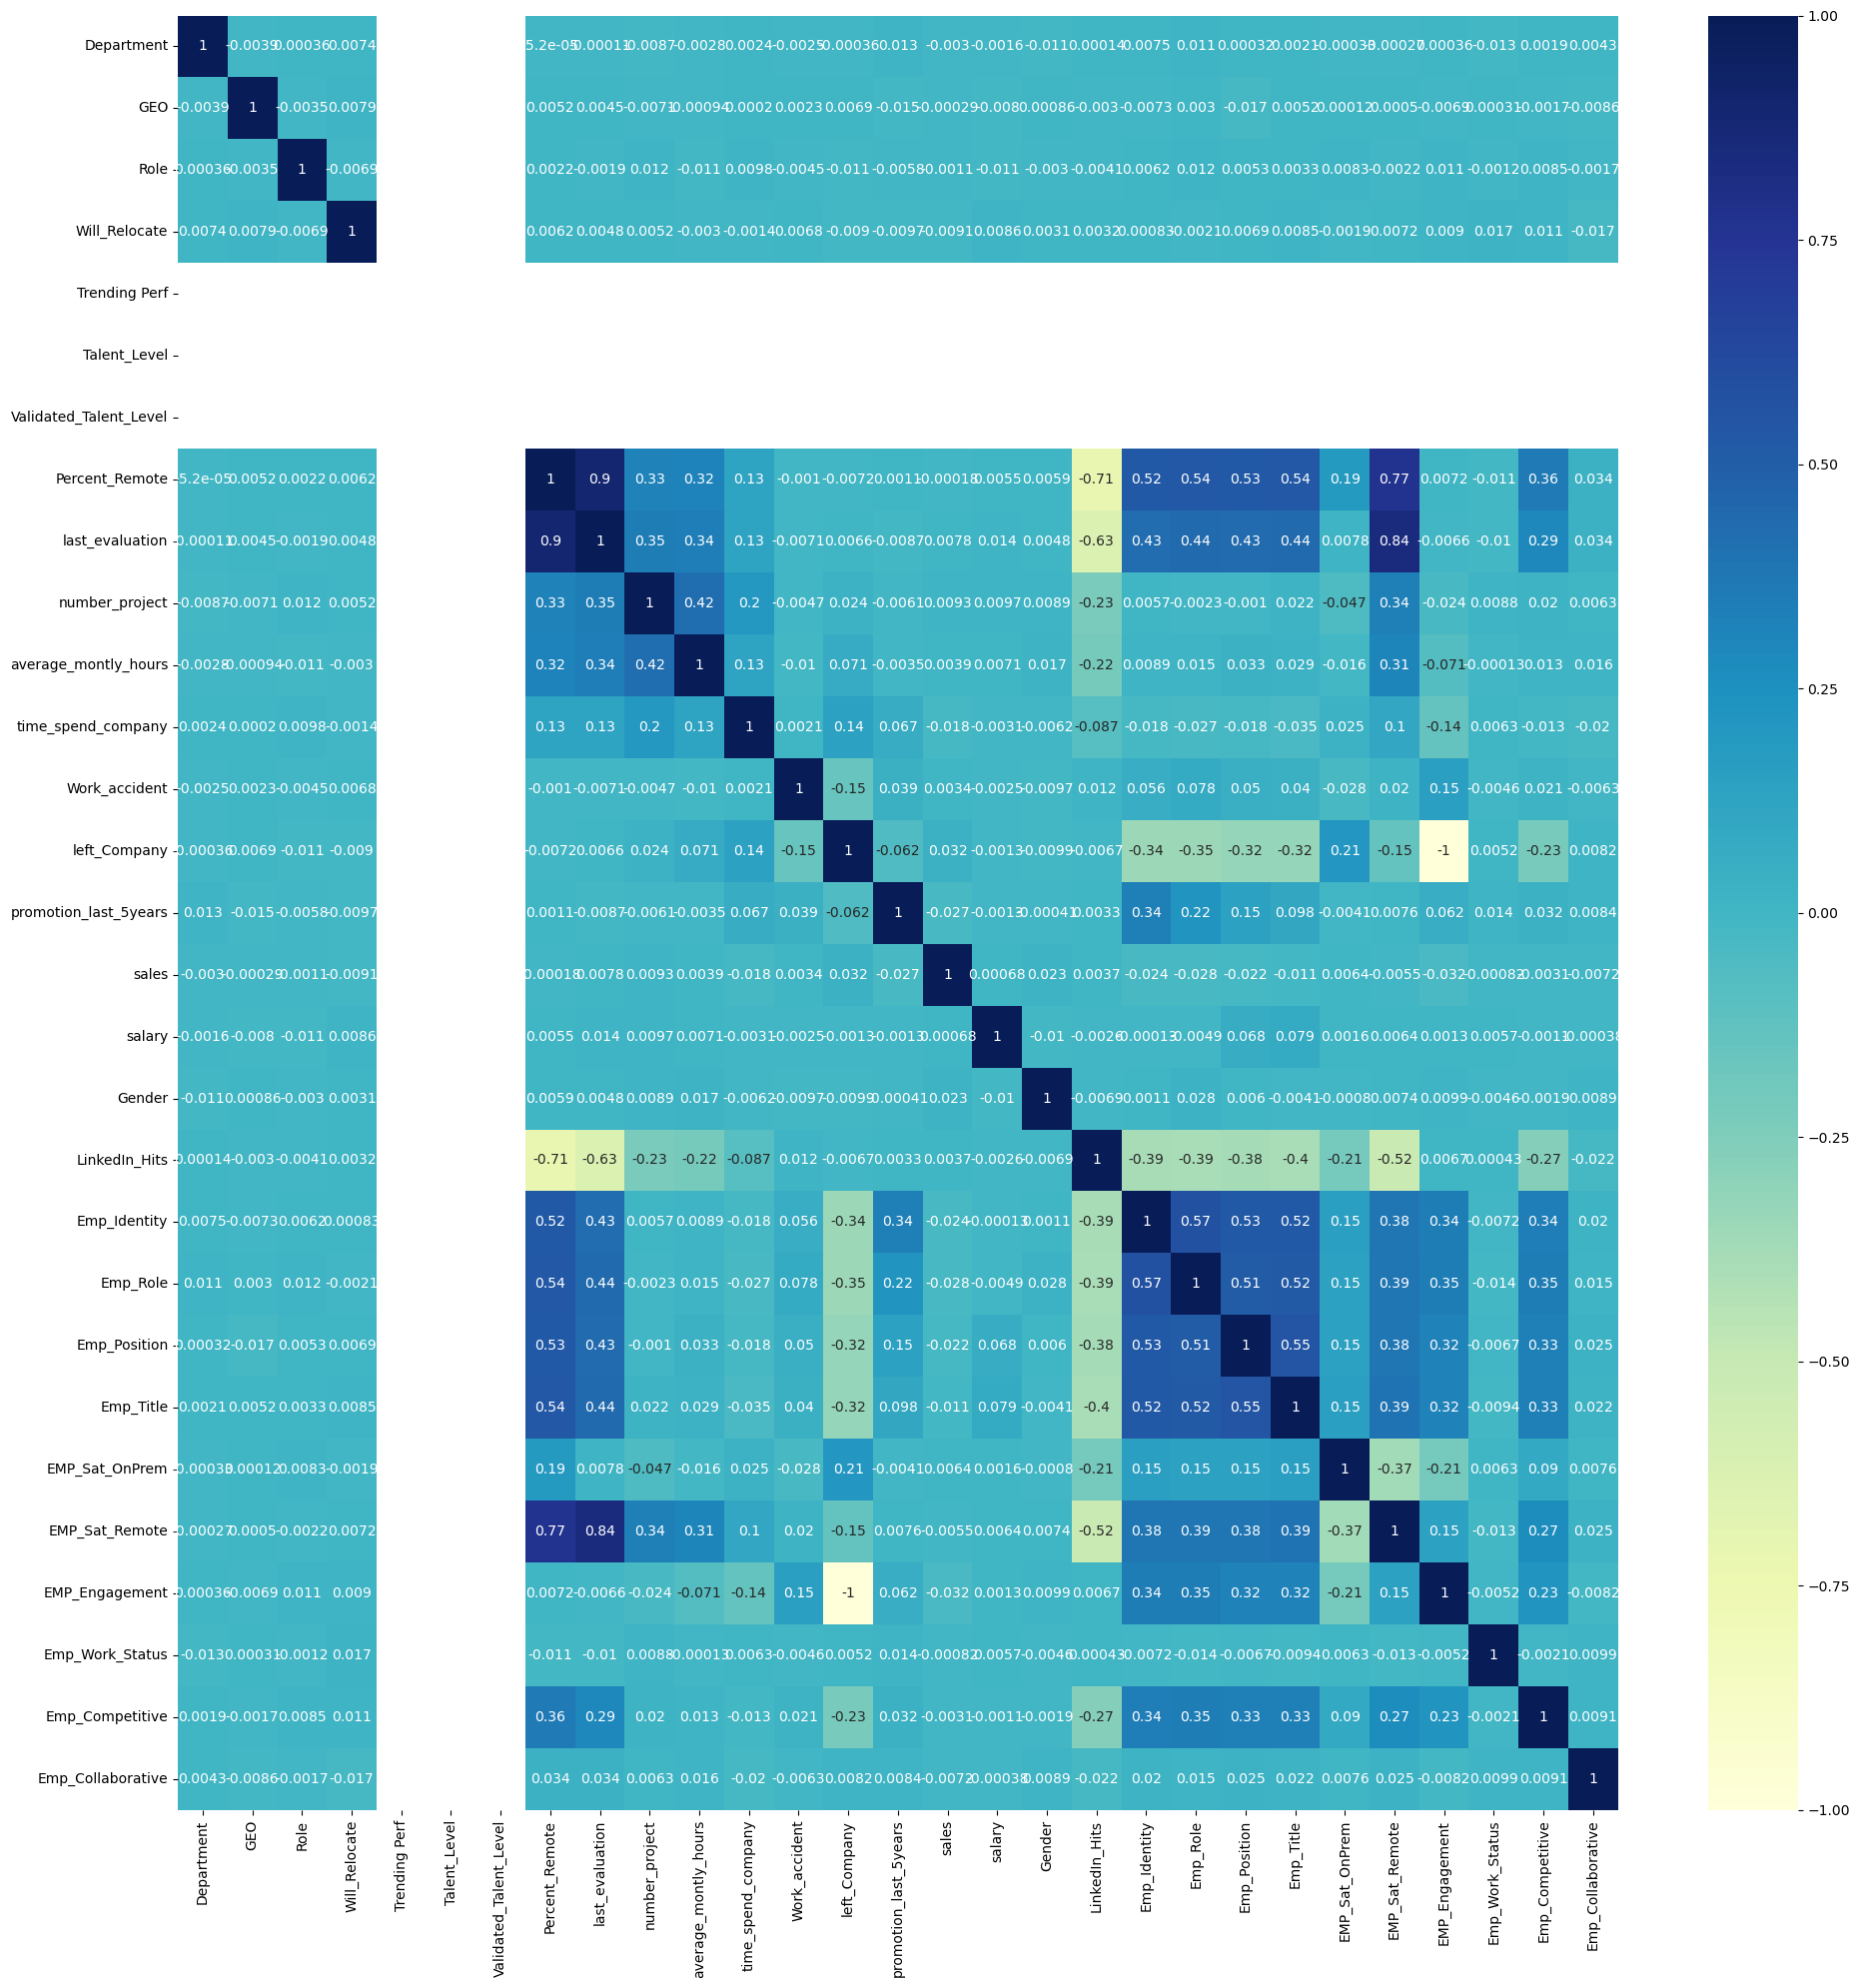

In [50]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True, cmap='YlGnBu')
plt.tight_layout()

In [51]:
data.drop(['Trending Perf', 'Talent_Level', 'Validated_Talent_Level','last_evaluation'], axis=1, inplace=True)

We drop the columns 'Trending Perf', 'Talent_Level', 'Validated_Talent_Level' since these columns have only one value. So keeping them will not have any effect on our model. The columns 'last evaluation' and 'percent_remote' have strong positive correlation. When we checked the correlation of these columns with our target variable 'left_company', we observed that 'percent_remote' have comparatively larger correlation with the target variable. So we kept the 'percent_remote' column and dropped 'last evaluation' column.

In [52]:
data.columns

Index(['Department', 'GEO', 'Role', 'Will_Relocate', 'Percent_Remote',
       'number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'left_Company', 'promotion_last_5years', 'sales',
       'salary', 'Gender', 'LinkedIn_Hits', 'Emp_Identity', 'Emp_Role',
       'Emp_Position', 'Emp_Title', 'EMP_Sat_OnPrem', 'EMP_Sat_Remote',
       'EMP_Engagement', 'Emp_Work_Status', 'Emp_Competitive',
       'Emp_Collaborative'],
      dtype='object')

In [53]:
data.shape

(14999, 25)

# Standardization:-

## Here we are going with two models :-

1)- Classification(with target variable- left_Company)

2)- Regression (with target variable- time_spend_company)

In the classification model, we predict whether an employee will leave or remain in the organization. In case the employee leaves, then we will predict within how much time he/she will leave using regression model.

# Classification :-

In [54]:
x1=data.drop('left_Company', axis=1)
y=data['left_Company']

In [55]:
#Standard scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x = sc.fit_transform(x1)

#converting it into a dataframe
x = pd.DataFrame(x, columns=x1.columns)

In [56]:
x.head()

,Department,GEO,Role,Will_Relocate,Percent_Remote,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,EMP_Sat_OnPrem,EMP_Sat_Remote,EMP_Engagement,Emp_Work_Status,Emp_Competitive,Emp_Collaborative
0,0.292879,1.545591,3.092578,-0.999667,-1.121168,-0.651538,-0.661782,-0.341235,2.432112,-0.147412,0.393725,-0.554955,1.012951,-0.713863,-1.115417,-1.104762,0.001849,-1.156345,0.575242,-1.459808,0.558997,-1.065125,-0.416489,-0.570128
1,0.878441,1.156071,1.468035,-0.999667,-1.121168,0.971113,-0.841993,-1.026126,-0.411165,-0.147412,-1.349230,-0.554955,-0.987214,2.077564,-0.138132,-1.104762,0.001849,-1.156345,0.575242,-1.459808,0.558997,0.343304,-1.070651,0.790199
2,-1.463808,-0.402012,1.468035,-0.999667,-1.121168,-1.462863,1.620892,-0.341235,-0.411165,-0.147412,0.045134,1.043004,-0.987214,1.234869,-1.115417,-1.104762,0.001849,0.011602,0.575242,-1.459808,0.558997,-0.713018,0.237673,0.790199
3,-0.878246,-1.181054,1.468035,-0.999667,-1.121168,0.159788,1.540798,0.343655,2.432112,-0.147412,0.045134,-2.152913,1.012951,0.971527,-0.138132,-1.104762,0.001849,-1.156345,0.575242,-1.459808,0.558997,0.343304,-1.070651,-0.570128
4,-0.292684,0.377029,-1.781051,-0.999667,-1.121168,1.782438,1.100282,1.028546,-0.411165,-0.147412,0.393725,-0.554955,-0.987214,-0.661195,-1.115417,-1.104762,0.001849,-1.156345,0.575242,-1.459808,0.558997,2.103841,0.237673,1.130280


# Regression-:
Here we are considering only the data having left_company value as 1. ie, the data of employees who left the organization.

In [57]:
df1 = data[data['left_Company']==1]

In [58]:
p1=df1.drop('time_spend_company', axis=1)
q=df1['time_spend_company']

In [59]:
#Standard scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
p = sc.fit_transform(p1)

#converting it into a dataframe
p = pd.DataFrame(p, columns=p1.columns)

In [60]:
p.head()

,Department,GEO,Role,Will_Relocate,Percent_Remote,number_project,average_montly_hours,Work_accident,left_Company,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,EMP_Sat_OnPrem,EMP_Sat_Remote,EMP_Engagement,Emp_Work_Status,Emp_Competitive,Emp_Collaborative
0,0.880345,0.756365,0.674707,-0.983612,-1.074459,-1.020679,-1.232456,-0.222883,0.0,-0.073138,0.343775,-0.662925,1.031004,1.146103,0.898827,0.987982,-0.994136,-0.998601,0.558457,-1.09594,-2.220446e-16,-0.724368,-0.391840,-0.583618
1,-1.465271,1.147019,0.674707,1.016661,-1.074459,-1.020679,-0.921969,-0.222883,0.0,-0.073138,0.700124,-0.662925,1.031004,1.357624,-0.941604,0.987982,-0.994136,-0.998601,0.558457,-1.09594,-2.220446e-16,1.041310,-1.144941,0.774102
2,-0.878867,1.537673,0.674707,-0.983612,-1.074459,-1.020679,-1.232456,-0.222883,0.0,-0.073138,-0.368922,-0.662925,1.031004,1.780668,0.898827,-0.948398,-0.994136,-0.998601,0.558457,-1.09594,-2.220446e-16,2.100717,0.737811,-1.262478
3,-0.292463,0.365712,0.674707,-0.983612,-1.074459,-1.020679,-1.183432,-0.222883,0.0,-0.073138,-0.368922,-0.662925,1.031004,-0.493190,-0.941604,-0.948398,-0.994136,-0.998601,0.558457,-1.09594,-2.220446e-16,0.335039,1.867462,-1.262478
4,1.466749,1.147019,0.674707,-0.983612,-1.074459,-1.020679,-0.840262,-0.222883,0.0,-0.073138,0.343775,1.253921,-0.969928,1.780668,-0.941604,0.987982,-0.994136,1.001401,0.558457,-1.09594,-2.220446e-16,0.335039,0.361261,-1.941338


# 3.Predictive Modelling and Fine Tuning :-

# Classification :-

In [61]:
#split the dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42, test_size=0.3)

## Logistic Regression :-

In [62]:
#logistic regression
from sklearn.linear_model import LogisticRegression
#creating an instance of the logistic regression model
logistic_model = LogisticRegression()
#training the model
logistic_model.fit(x_train,y_train)
#testing the model
y_predict = logistic_model.predict(x_test)

In [63]:
#check the performance of the model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print('Accuracy is :', accuracy_score(y_test,y_predict))
print('Precision is :', precision_score(y_test,y_predict))
print('Recall is :', recall_score(y_test,y_predict))
print('f1 Score is :', f1_score(y_test,y_predict))

Accuracy is : 1.0
Precision is : 1.0
Recall is : 1.0
f1 Score is : 1.0


In [64]:
#check confusion matrix
confusion_matrix(y_test, y_predict)

array([[3458,    0],
       [   0, 1042]], dtype=int64)

There is only one misclassification.

# Descision tree Classifier

In [65]:
#import library
from sklearn.tree import DecisionTreeClassifier
#create an instance of the model
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
y_predict = dt_model.predict(x_test)

In [66]:
#check the performance of the model
print('Accuracy is :', accuracy_score(y_test,y_predict))
print('Precision is :', precision_score(y_test,y_predict))
print('Recall is :', recall_score(y_test,y_predict))
print('f1 Score is :', f1_score(y_test,y_predict))

Accuracy is : 1.0
Precision is : 1.0
Recall is : 1.0
f1 Score is : 1.0


# Random Forest Classifier

In [67]:
#import libraries 
from sklearn.ensemble import RandomForestClassifier
#create the instance of the model
rf=RandomForestClassifier()
#train the data
rf.fit(x_train,y_train)
#predict x_test
y_predict=rf.predict(x_test)

In [68]:
print('Accuracy is :', accuracy_score(y_test,y_predict))
print('Precision is :', precision_score(y_test,y_predict))
print('Recall is :', recall_score(y_test,y_predict))
print('f1 Score is :', f1_score(y_test,y_predict))

Accuracy is : 1.0
Precision is : 1.0
Recall is : 1.0
f1 Score is : 1.0


# Gradient Boosting classifier

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
#predict the y
y_predict=gb.predict(x_test)

In [70]:
print('Accuracy is :', accuracy_score(y_test,y_predict))
print('Precision is :', precision_score(y_test,y_predict))
print('Recall is :', recall_score(y_test,y_predict))
print('f1 Score is :', f1_score(y_test,y_predict))

Accuracy is : 1.0
Precision is : 1.0
Recall is : 1.0
f1 Score is : 1.0


# Regression :-

In [71]:
from sklearn.model_selection import train_test_split
p_train,p_test,q_train,q_test = train_test_split(p,q,random_state=42, test_size=0.2)

In [72]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=32)
rfr.fit(p_train,q_train)
predictions=rfr.predict(p_test)
from sklearn.metrics import mean_squared_error, r2_score
print('MSE is :',mean_squared_error(q_test,predictions))
r2_score = rfr.score(p_test,q_test)
print('r2-score is :',r2_score)

MSE is : 0.16675944055944056
r2-score is : 0.8271403877660265


In [73]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(random_state=32)
gbr.fit(p_train,q_train)
predictions=gbr.predict(p_test)
print('MSE is :',mean_squared_error(q_test,predictions))
r2_score = gbr.score(p_test,q_test)
print('r2-score is :',r2_score)

MSE is : 0.17155153713349017
r2-score is : 0.8221729930997995


In [74]:
!pip install xgboost

In [75]:
from xgboost import XGBRegressor
xgb=XGBRegressor(random_state=32)
xgb.fit(p_train,q_train)
predictions=xgb.predict(p_test)

In [76]:
print('MSE is :',mean_squared_error(q_test,predictions))
r2_score = xgb.score(p_test,q_test)
print('r2-score is :',r2_score)

MSE is : 0.17042875355024817
r2-score is : 0.8233368488561559


Performance of these models improved slightly after fine tuning of hyper parameters.

Among the models we have created, we found out that gradient boosting has the highest performance. Also it helps in reducing variance and bias in a machine learning ensemble. So we chose gradient boosting as the regression model.

## Feature Importance

In [77]:
pd.Series(rf.feature_importances_, index=x.columns).sort_values(ascending=False)*100

EMP_Engagement           53.176787
number_project           10.904203
time_spend_company        5.348851
Emp_Identity              4.839030
average_montly_hours      4.601121
Emp_Role                  4.493915
Emp_Title                 3.067783
Emp_Position              2.811060
EMP_Sat_OnPrem            2.602704
Percent_Remote            2.317157
LinkedIn_Hits             2.268881
EMP_Sat_Remote            1.717544
Emp_Competitive           0.584964
Work_accident             0.313402
salary                    0.182077
Emp_Collaborative         0.140997
sales                     0.138011
Emp_Work_Status           0.122913
GEO                       0.110308
Department                0.088533
Role                      0.081156
Will_Relocate             0.034180
Gender                    0.031988
promotion_last_5years     0.022434
dtype: float64

In [78]:
pd.Series(gbr.feature_importances_, index=p.columns).sort_values(ascending=False)*100

number_project           60.852662
Percent_Remote           22.704879
average_montly_hours     10.618471
EMP_Sat_Remote            1.661525
EMP_Sat_OnPrem            1.078585
sales                     0.591757
LinkedIn_Hits             0.489337
Emp_Competitive           0.429622
Emp_Work_Status           0.417115
salary                    0.278408
Emp_Collaborative         0.235106
GEO                       0.229783
Role                      0.137974
Department                0.137154
Emp_Title                 0.046565
Emp_Identity              0.035684
Gender                    0.034301
Work_accident             0.008961
Will_Relocate             0.007098
Emp_Role                  0.005012
Emp_Position              0.000000
promotion_last_5years     0.000000
left_Company              0.000000
EMP_Engagement            0.000000
dtype: float64

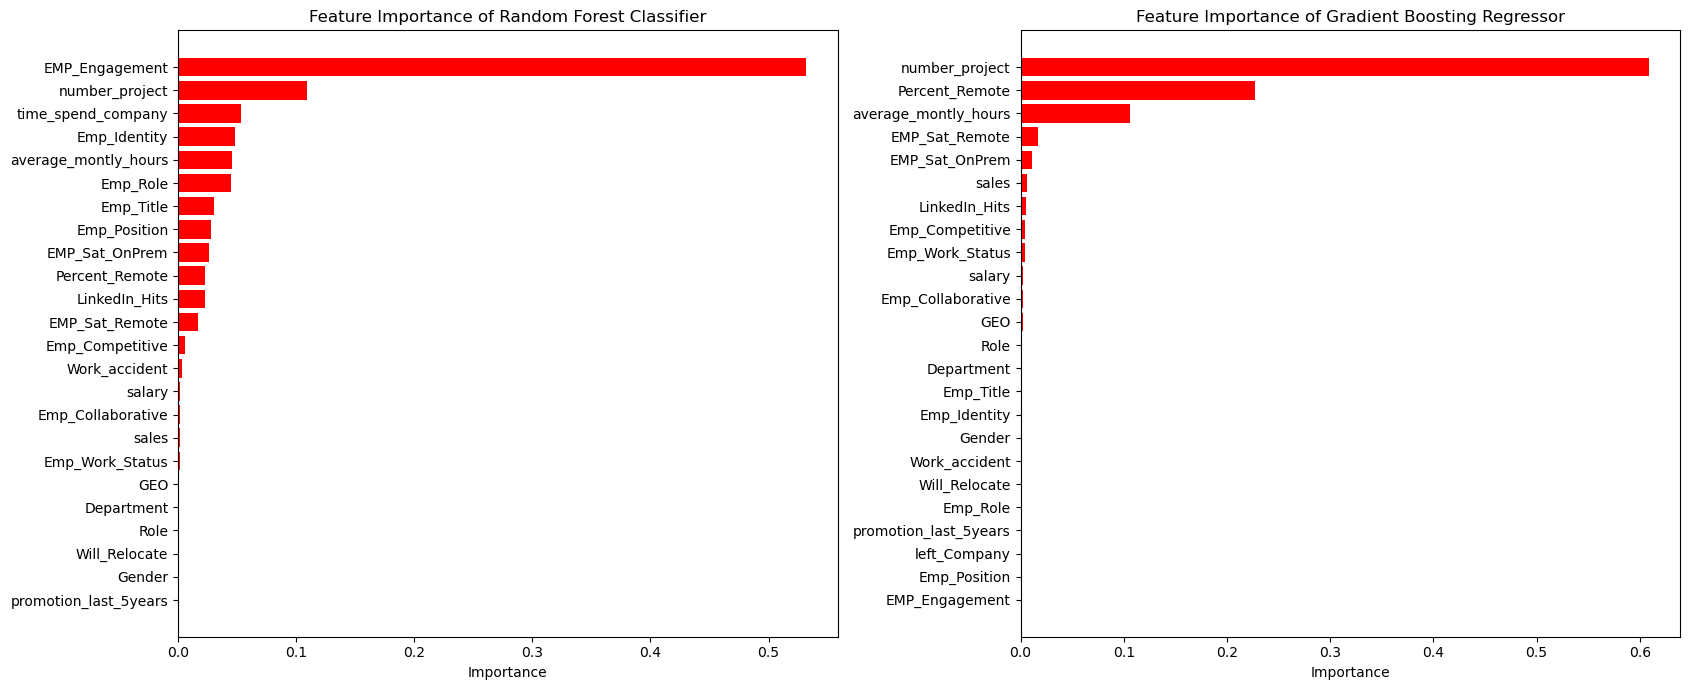

In [79]:
plt.figure(figsize=(17,7))

plt.subplot(1, 2, 1)
features_list = x.columns.values
feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importance of Random Forest Classifier')

plt.subplot(1, 2, 2)
features_list = p.columns.values
feature_importance = gbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importance of Gradient Boosting Regressor')

plt.tight_layout()
plt.show()


We will drop the features having a common lower feature importance by looking into both the models.

## Classification

In [80]:
x.drop(['sales','Emp_Collaborative','Emp_Work_Status','GEO','Role','Department','Will_Relocate','Gender','promotion_last_5years','EMP_Sat_OnPrem','Emp_Competitive','Work_accident','salary','Emp_Position','Emp_Title', 'Emp_Identity'], axis=1, inplace=True)

In [81]:
x.columns

Index(['Percent_Remote', 'number_project', 'average_montly_hours',
       'time_spend_company', 'LinkedIn_Hits', 'Emp_Role', 'EMP_Sat_Remote',
       'EMP_Engagement'],
      dtype='object')

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42, test_size=0.3)

In [83]:
rf=RandomForestClassifier()
#train the data
rf.fit(x_train,y_train)
#predict x_test
y_pred=rf.predict(x_test)

In [84]:
print('Accuracy is :', accuracy_score(y_test,y_pred))
print('Precision is :', precision_score(y_test,y_pred))
print('Recall is :', recall_score(y_test,y_pred))
print('f1 Score is :', f1_score(y_test,y_pred))

Accuracy is : 1.0
Precision is : 1.0
Recall is : 1.0
f1 Score is : 1.0


## Regression

In [85]:
p.drop(['left_Company','sales','Emp_Collaborative','Emp_Work_Status','GEO','Role','Department','Will_Relocate','Gender','promotion_last_5years','Emp_Competitive','Work_accident','salary','Emp_Position','Emp_Title', 'Emp_Identity','EMP_Sat_OnPrem'], axis=1, inplace=True)

In [86]:
p.columns

Index(['Percent_Remote', 'number_project', 'average_montly_hours',
       'LinkedIn_Hits', 'Emp_Role', 'EMP_Sat_Remote', 'EMP_Engagement'],
      dtype='object')

In [87]:
p_train,p_test,q_train,q_test = train_test_split(p,q,random_state=42, test_size=0.2)

In [88]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(n_estimators=91,max_depth=5, min_samples_split=5, 
                                         random_state=32)
gbr.fit(p_train,q_train)
predictions=gbr.predict(p_test)

In [89]:
print('MSE is :',mean_squared_error(q_test,predictions))
r2_score = gbr.score(p_test,q_test)
print('r2-score is :',r2_score)

MSE is : 0.16473397561616868
r2-score is : 0.8292399455692484
